# HDA api for CAMS data tutorial

The purpose of this colab notebook is to retrieve a simple set of data from CAMS using HDA APIs. We will download data and decompress them into a google drive folder, so make sure you have enough space on your drive. 

## Install dependencies

Just to be clear, executing a command with the "!" before in a cell of colab basically is like executing that line in a linux terminal using bash

In [1]:
# HDA APIs dependencies
!pip install hda

In [2]:
# Install library to read netcds files
!pip install netcdf4

Next cell mount in the colab notebook the google drive folder, click on the link that appears under the cell, login and copy the string into the field of the cell to connect.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Rebase the current directory to a directory called "ESoWC", make sure you created it before in your drive. 
(It should create it automatically but you never know :) )

In [4]:
%cd /content/drive/My Drive/ESoWC

/content/drive/My Drive/ESoWC


In you drive directory there should be a file called "hda_credentials.txt" which containt the base URL and username and password to connect to wekeo.
The structure of the file should be: 

`url: https://wekeo-broker.apps.mercator.dpi.wekeo.eu/databroker user: [username] password: [password]`

Where instead of `[username]` and `[password]` you substitute yours credentials


In [ ]:
%cat hda_credentials.txt >> $HOME/.hdarc

In [ ]:
!python connect_hda.py

2021-07-18 23:47:04,144 DEBUG HDA {'url': 'https://wekeo-broker.apps.mercator.dpi.wekeo.eu/databroker', 'token': None, 'user': 'nicobrunello', 'password': ',3zdzJnU$MDt3KHy', 'quiet': False, 'verify': True, 'timeout': None, 'sleep_max': 120, 'retry_max': 500, 'progress': True}
2021-07-18 23:47:04,147 DEBUG ===> GET https://wekeo-broker.apps.mercator.dpi.wekeo.eu/databroker/gettoken
2021-07-18 23:47:04,149 DEBUG Starting new HTTPS connection (1): wekeo-broker.apps.mercator.dpi.wekeo.eu:443
2021-07-18 23:47:06,225 DEBUG https://wekeo-broker.apps.mercator.dpi.wekeo.eu:443 "GET /databroker/gettoken HTTP/1.1" 200 61
2021-07-18 23:47:06,226 DEBUG <=== {"access_token": "17c38876-0c7b-3445-8e06-484d04090129"}
2021-07-18 23:47:06,226 DEBUG Token is 17c38876-0c7b-3445-8e06-484d04090129
2021-07-18 23:47:06,226 DEBUG ===> POST https://wekeo-broker.apps.mercator.dpi.wekeo.eu/databroker/datarequest
2021-07-18 23:47:06,226 DEBUG ===> POST {"datasetId": "EO:ECMWF:DAT:CAMS_GLOBAL_REANALYSIS_EAC4", "bou

The next three cells are meant to copy the json describing the query from the wekeo repo to your current folder, ALTERNATIVELY YOU CAN JUST CREATE A "query.json" FILE INTO THE "ESoWC" folder which will be filled with the text of the query copied from the wekeo web-tool.

## Data visualization and Exploration


In [7]:
from create_dataset.make_dataset import CustomDataset

fn = 'Data/global_reanalysis_may2019.nc'
ds = CustomDataset(fn)


Opening dataset at :  Data/global_reanalysis_may2019.nc
Done!


In [8]:
ds.get_dataset()

<xarray.Dataset>
Dimensions:    (latitude: 11, longitude: 11, time: 248)
Coordinates:
  * longitude  (longitude) float32 4.0 4.75 5.5 6.25 ... 9.25 10.0 10.75 11.5
  * latitude   (latitude) float32 50.5 49.75 49.0 48.25 ... 44.5 43.75 43.0
  * time       (time) datetime64[ns] 2019-05-01 ... 2019-05-31T21:00:00
Data variables:
    tcco       (time, latitude, longitude) float32 ...
    tcno2      (time, latitude, longitude) float32 ...
    tc_no      (time, latitude, longitude) float32 ...
    gtco3      (time, latitude, longitude) float32 ...
    tcwv       (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-07-18 22:31:47 GMT by grib_to_netcdf-2.20.0: /opt/ecmw...

In [9]:
da_rescale = ds.rescale(method= 'linear')
da_rescale

<xarray.Dataset>
Dimensions:    (latitude: 31, longitude: 31, time: 248)
Coordinates:
  * time       (time) datetime64[ns] 2019-05-01 ... 2019-05-31T21:00:00
  * latitude   (latitude) float64 43.0 43.25 43.5 43.75 ... 50.0 50.25 50.5
  * longitude  (longitude) float64 4.0 4.25 4.5 4.75 ... 10.75 11.0 11.25 11.5
Data variables:
    tcco       (time, latitude, longitude) float64 0.0009544 ... 0.0007572
    tcno2      (time, latitude, longitude) float64 3.432e-06 ... 3.53e-06
    tc_no      (time, latitude, longitude) float64 9.295e-10 ... 2.866e-08
    gtco3      (time, latitude, longitude) float64 0.007882 ... 0.007071
    tcwv       (time, latitude, longitude) float64 14.48 14.66 ... 23.34 23.62
Attributes:
    Conventions:  CF-1.6
    history:      2021-07-18 22:31:47 GMT by grib_to_netcdf-2.20.0: /opt/ecmw...

In [ ]:
#Old cell
'''import pandas as pd
import xarray as xr

# Open netCDF file and convert to dataframe

open_netcdf = xr.open_dataset(fn)
#dataset = open_netcdf.to_dataframe()
#dataset.head()
open_netcdf'''

<xarray.Dataset>
Dimensions:    (latitude: 11, longitude: 11, time: 248)
Coordinates:
  * longitude  (longitude) float32 4.0 4.75 5.5 6.25 ... 9.25 10.0 10.75 11.5
  * latitude   (latitude) float32 50.5 49.75 49.0 48.25 ... 44.5 43.75 43.0
  * time       (time) datetime64[ns] 2019-05-01 ... 2019-05-31T21:00:00
Data variables:
    tcco       (time, latitude, longitude) float32 ...
    tcno2      (time, latitude, longitude) float32 ...
    tc_no      (time, latitude, longitude) float32 ...
    gtco3      (time, latitude, longitude) float32 ...
    tcwv       (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-07-18 22:31:47 GMT by grib_to_netcdf-2.20.0: /opt/ecmw...

In [ ]:
#Old cell
'''import numpy as np
#from rescaling import rescale_grid
def rescale_grid(data, target_res, method = 'nearest'):
  
  assert ('latitude' in data.variables),"latitude column missing (name must be 'latitude')"
  assert ('longitude' in data.variables),"longitude column missing (name must be 'longitude')"

  #da = data.to_array()

  lats = data.latitude.values
  longs = data.longitude.values

  lats.sort()
  longs.sort()

  #lats_res = round(abs(lats[1] - lats[0]), 2) # supposing at least 2 values and max_precision = 2 decimals and res_lat = res_long
  #lat_interval = abs(round(lats[-1],2) - round(lats[0], 2))
  #long_interval = abs(round(longs[-1],2) - round(longs[0], 2))
  lat_interval = np.float32(lats[-1] - lats[0])
  long_interval = np.float32(longs[-1] - longs[0])
  #print("lat interval is ",lat_interval)
  #print("long interval is --> " , long_interval)
  lat_new_squares = lat_interval // target_res
  #print(lat_new_squares)
  long_new_squares = long_interval // target_res
  #print(long_new_squares)
  new_lat_values= np.around(np.arange(0, lat_new_squares +1 , 1) * target_res + round(lats[0], 2), decimals=2)
  #print("New latitude values are -> ", new_lat_values)
  new_long_values= np.around(np.arange(0, long_new_squares +1 , 1) * target_res + round(longs[0], 2), decimals=2)
  #print("New longitude values are -> ", new_long_values)
  #da = da.sortby(['latitude','longitude','time'])
  #df_temp = data.interp(latitude = new_lat_values, longitude = new_long_values, method = method)
  #df= df_temp.interp(longitude = new_long_values, method = method)

  return data.interp(latitude = new_lat_values, longitude = new_long_values, method = method)

da_rescale =rescale_grid(open_netcdf, 0.25, 'linear')
da_rescale'''

<xarray.Dataset>
Dimensions:    (latitude: 31, longitude: 31, time: 248)
Coordinates:
  * time       (time) datetime64[ns] 2019-05-01 ... 2019-05-31T21:00:00
  * latitude   (latitude) float64 43.0 43.25 43.5 43.75 ... 50.0 50.25 50.5
  * longitude  (longitude) float64 4.0 4.25 4.5 4.75 ... 10.75 11.0 11.25 11.5
Data variables:
    tcco       (time, latitude, longitude) float64 0.0009544 ... 0.0007572
    tcno2      (time, latitude, longitude) float64 3.432e-06 ... 3.53e-06
    tc_no      (time, latitude, longitude) float64 9.295e-10 ... 2.866e-08
    gtco3      (time, latitude, longitude) float64 0.007882 ... 0.007071
    tcwv       (time, latitude, longitude) float64 14.48 14.66 ... 23.34 23.62
Attributes:
    Conventions:  CF-1.6
    history:      2021-07-18 22:31:47 GMT by grib_to_netcdf-2.20.0: /opt/ecmw...

In [ ]:
dataset = da_rescale.to_dataframe()

In [ ]:
import numpy as np

#Split "time" index into "day" and "hour"
dataset['Days'] = dataset.index.get_level_values("time").day 
dataset['Hours'] = dataset.index.get_level_values("time").hour
dataset.set_index('Days', append=True, inplace=True)
dataset.set_index('Hours', append=True, inplace=True)

dataset['lat'] = np.around(dataset.index.get_level_values("latitude"),2)
dataset['long'] = np.around(np.around(dataset.index.get_level_values("longitude"),2),2)
dataset.set_index('lat', append=True, inplace=True)
dataset.set_index('long', append=True, inplace=True)

#Drop "level" and "time" indexes
dataset.reset_index(level=[0,1,2], drop=True, inplace=True)
dataset = dataset.reorder_levels(['lat','long','Days', 'Hours'])
dataset

tcco     tcno2         tc_no     gtco3       tcwv
lat  long Days Hours                                                       
43.0 4.0  1    0      0.000954  0.000003  9.295036e-10  0.007882  14.479529
               3      0.000955  0.000003  1.093667e-09  0.007809  13.259476
               6      0.000964  0.000002  5.430377e-07  0.007699  12.546607
               9      0.000977  0.000002  8.260300e-07  0.007515  12.151699
               12     0.000980  0.000002  8.073225e-07  0.007325  12.287691
...                        ...       ...           ...       ...        ...
50.5 11.5 31   9      0.000743  0.000002  9.708493e-07  0.007121  24.843456
               12     0.000755  0.000002  9.947261e-07  0.007115  25.914454
               15     0.000757  0.000002  8.509734e-07  0.007112  26.203859
               18     0.000760  0.000003  5.827501e-07  0.007080  25.026394
               21     0.000757  0.000004  2.866273e-08  0.007071  23.624371

[238328 rows x 5 columns]

Analyze grid resolution of lat x long

In [ ]:
lat_c = len(dataset.index.get_level_values("lat").unique())
lat_min = dataset.index.get_level_values("lat").min()
lat_max = dataset.index.get_level_values("lat").max()

long_c = len(dataset.index.get_level_values("long").unique())
long_min = dataset.index.get_level_values("long").min()
long_max = dataset.index.get_level_values("long").max()

print("Number of lat values : " + str(lat_c))
print("Number of long values : " + str(long_c))
print("Min lat value : " + str(lat_min))
print("Max lat value : " + str(lat_max))
print("Min long value : " + str(long_min))
print("Max long value : " + str(long_max))



Number of lat values : 31
Number of long values : 31
Min lat value : 43.0
Max lat value : 50.5
Min long value : 4.0
Max long value : 11.5


Sub-plots

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f37d4cd9990>,
      dtype=object)

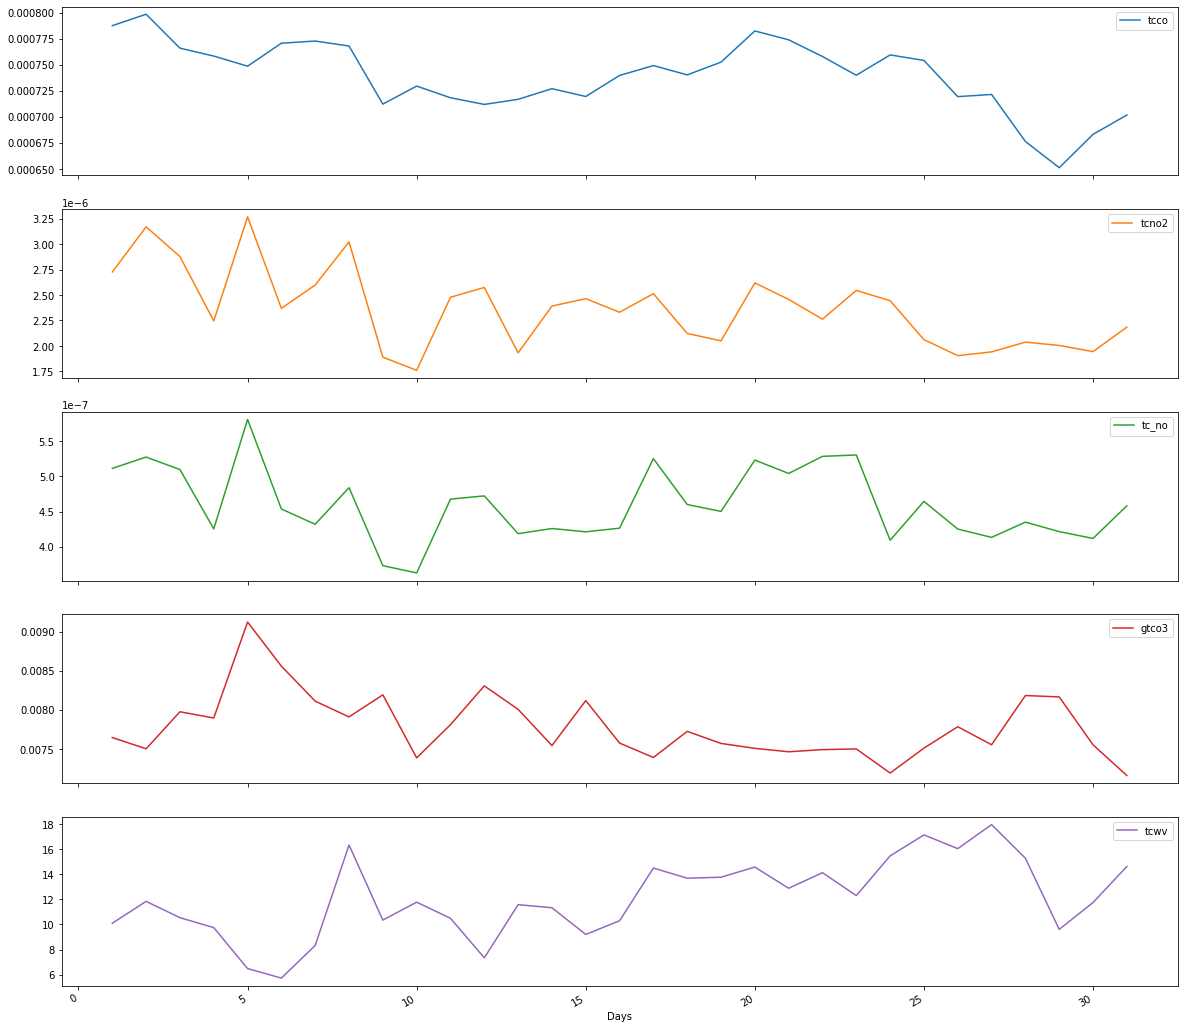

In [ ]:
d1 = dataset[dataset.index.get_level_values("lat") == 44.5]
d2 = d1[d1.index.get_level_values('long') == 7.00]
d2.groupby('Days').mean().plot(subplots=True, figsize=(20,20))

## Emission data

In [ ]:
import pandas as pd
import xarray as xr

# Open netCDF file and convert to dataframe

filename = 'Data/MAY_HOURLY_2019_NOX_reduced_v2.nc' 
open_netcdf = xr.open_dataset(filename)
#select area of interest
reduced = open_netcdf.where(open_netcdf.latitude >=lat_min)
reduced = reduced.where(reduced.latitude <=lat_max)
reduced = open_netcdf.where(open_netcdf.longitude >=long_min)
reduced = reduced.where(reduced.longitude <=long_max)

da_emissions_rescale =rescale_grid(reduced, 0.25, 'linear')
da_emissions_rescale

<xarray.Dataset>
Dimensions:         (latitude: 32, longitude: 32, time: 720)
Coordinates:
  * time            (time) datetime64[ns] 2019-05-01T01:00:00 ... 2019-05-31
  * latitude        (latitude) float64 43.05 43.3 43.55 43.8 ... 50.3 50.55 50.8
  * longitude       (longitude) float64 4.1 4.35 4.6 4.85 ... 11.35 11.6 11.85
Data variables:
    crs             (longitude) float64 -2.147e+09 -2.147e+09 ... nan nan
    EMISSIONS_2019  (time, latitude, longitude) float64 2.6e-11 ... nan
Attributes:
    Conventions:  CF-1.4
    created_by:   R, packages ncdf4 and raster (version 3.4-5)
    date:         2021-07-09 08:06:15

In [ ]:
df = open_netcdf.to_dataframe()
df.head()

crs  EMISSIONS_2019
latitude  longitude time                                           
43.049999 4.1       2019-05-01 01:00:00 -2147483647    2.599644e-11
                    2019-05-01 02:00:00 -2147483647    1.767758e-11
                    2019-05-01 03:00:00 -2147483647    1.559786e-11
                    2019-05-01 04:00:00 -2147483647    1.455800e-11
                    2019-05-01 05:00:00 -2147483647    1.767758e-11

In [ ]:
df.describe()

,crs,EMISSIONS_2019
count,4.608000e+06,4.608000e+06
mean,-2.147484e+09,4.196440e-11
std,8.977772e-02,1.162611e-10
min,-2.147484e+09,8.974667e-16
25%,-2.147484e+09,6.020164e-12
50%,-2.147484e+09,1.735810e-11
75%,-2.147484e+09,4.139250e-11
max,-2.147484e+09,7.485653e-09


In [ ]:
df.index.get_level_values("time").day

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            30, 30, 30, 30, 30, 30, 30, 30, 30, 31],
           dtype='int64', name='time', length=4608000)

In [ ]:
import numpy as np

#Split "time" index into "day" and "hour"
df['Days'] = df.index.get_level_values("time").day 
df['Hours'] = df.index.get_level_values("time").hour
df.set_index('Days', append=True, inplace=True)
df.set_index('Hours', append=True, inplace=True)

#df['lat'] = np.float32(np.around(df.index.get_level_values("latitude"),2))
#df['long'] = np.float32(np.around(df.index.get_level_values("longitude"),2))
df['lat'] = np.around(df.index.get_level_values("latitude"),2)
df['long'] =np.around(df.index.get_level_values("longitude"),2)
df.set_index('lat', append=True, inplace=True)
df.set_index('long', append=True, inplace=True)

#Drop "level" and "time" indexes
df.reset_index(level=[0,1,2], drop=True, inplace=True)
df = df.reorder_levels(['lat','long','Days', 'Hours'])
#drop useless columns
df.drop(columns=['crs'],inplace=True)
df

EMISSIONS_2019
lat   long Days Hours                
43.05 4.1  1    1        2.599644e-11
                2        1.767758e-11
                3        1.559786e-11
                4        1.455800e-11
                5        1.767758e-11
...                               ...
50.95 12.0 30   20       9.348683e-11
                21       8.354142e-11
                22       7.260148e-11
                23       4.276525e-11
           31   0        2.486352e-11

[4608000 rows x 1 columns]

In [ ]:
#Print lat,lon of concentrations and emissions
print(df.index.get_level_values('lat').unique())
print(df.index.get_level_values('long').unique())
print(dataset.index.get_level_values('lat').unique())
print(dataset.index.get_level_values('long').unique())

Float64Index([43.05, 43.15, 43.25, 43.35, 43.45, 43.55, 43.65, 43.75, 43.85,
              43.95, 44.05, 44.15, 44.25, 44.35, 44.45, 44.55, 44.65, 44.75,
              44.85, 44.95, 45.05, 45.15, 45.25, 45.35, 45.45, 45.55, 45.65,
              45.75, 45.85, 45.95, 46.05, 46.15, 46.25, 46.35, 46.45, 46.55,
              46.65, 46.75, 46.85, 46.95, 47.05, 47.15, 47.25, 47.35, 47.45,
              47.55, 47.65, 47.75, 47.85, 47.95, 48.05, 48.15, 48.25, 48.35,
              48.45, 48.55, 48.65, 48.75, 48.85, 48.95, 49.05, 49.15, 49.25,
              49.35, 49.45, 49.55, 49.65, 49.75, 49.85, 49.95, 50.05, 50.15,
              50.25, 50.35, 50.45, 50.55, 50.65, 50.75, 50.85, 50.95],
             dtype='float64', name='lat')
Float64Index([ 4.1,  4.2,  4.3,  4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5.0,  5.1,
               5.2,  5.3,  5.4,  5.5,  5.6,  5.7,  5.8,  5.9,  6.0,  6.1,  6.2,
               6.3,  6.4,  6.5,  6.6,  6.7,  6.8,  6.9,  7.0,  7.1,  7.2,  7.3,
               7.4,  7.5,  7.6,

In [ ]:
df_emission= df

## Save datsets to netcdf

In [ ]:
emissions_xarray = df_emission.to_xarray()
emissions_xarray.to_netcdf('Data/emissions_dataset.nc')
concentrations_xarray = dataset.to_xarray()
concentrations_xarray.to_netcdf('Data/conc_dataset.nc')

## Plot

### Hour analysis

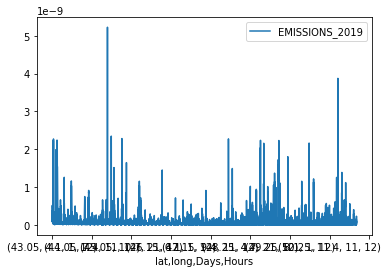

In [ ]:
df_emission[df_emission.index.get_level_values("Hours")==12].plot()

In [ ]:
dataset

tcco     tcno2         tc_no     gtco3       tcwv
lat  long Days Hours                                                       
43.0 4.0  1    0      0.000954  0.000003  9.295036e-10  0.007882  14.479529
               3      0.000955  0.000003  1.093667e-09  0.007809  13.259476
               6      0.000964  0.000002  5.430377e-07  0.007699  12.546607
               9      0.000977  0.000002  8.260300e-07  0.007515  12.151699
               12     0.000980  0.000002  8.073225e-07  0.007325  12.287691
...                        ...       ...           ...       ...        ...
50.5 11.5 31   9      0.000743  0.000002  9.708493e-07  0.007121  24.843456
               12     0.000755  0.000002  9.947261e-07  0.007115  25.914454
               15     0.000757  0.000002  8.509734e-07  0.007112  26.203859
               18     0.000760  0.000003  5.827501e-07  0.007080  25.026394
               21     0.000757  0.000004  2.866273e-08  0.007071  23.624371

[238328 rows x 5 columns]

In [ ]:
complete_dataset = pd.concat([dataset, df_emission], axis=1)
complete_dataset

tcco     tcno2  ...       tcwv  EMISSIONS_2019
lat   long Days Hours                      ...                           
43.00 4.0  1    0      0.000954  0.000003  ...  14.479529             NaN
                3      0.000955  0.000003  ...  13.259476             NaN
                6      0.000964  0.000002  ...  12.546607             NaN
                9      0.000977  0.000002  ...  12.151699             NaN
                12     0.000980  0.000002  ...  12.287691             NaN
...                         ...       ...  ...        ...             ...
50.95 12.0 30   20          NaN       NaN  ...        NaN    9.348683e-11
                21          NaN       NaN  ...        NaN    8.354142e-11
                22          NaN       NaN  ...        NaN    7.260148e-11
                23          NaN       NaN  ...        NaN    4.276525e-11
           31   0           NaN       NaN  ...        NaN    2.486352e-11

[4792328 rows x 6 columns]

In [ ]:
pure_dataset = complete_dataset.dropna()
pure_dataset

tcco     tcno2  ...       tcwv  EMISSIONS_2019
lat   long Days Hours                      ...                           
43.25 4.5  1    3      0.000943  0.000003  ...  13.049330    2.114118e-11
                6      0.000950  0.000003  ...  12.593228    4.228235e-11
                9      0.000963  0.000002  ...  12.418467    2.494659e-10
                12     0.000968  0.000003  ...  12.718789    1.677200e-10
                15     0.000967  0.000003  ...  12.746266    1.860424e-10
...                         ...       ...  ...        ...             ...
50.25 11.5 30   12     0.000764  0.000002  ...  11.609183    1.944130e-11
                15     0.000745  0.000002  ...  16.033836    2.192979e-11
                18     0.000730  0.000003  ...  19.665769    2.301850e-11
                21     0.000743  0.000004  ...  21.837119    1.306456e-11
           31   0      0.000746  0.000004  ...  24.172694    3.888261e-12

[54000 rows x 6 columns]

In [ ]:
d1 = complete_dataset[complete_dataset.index.get_level_values("lat") == 43.25]
d2 = d1[d1.index.get_level_values('long') == 4.5]
d3 = d2[d2.index.get_level_values('Days') == 15]
d3

tcco     tcno2  ...       tcwv  EMISSIONS_2019
lat   long Days Hours                      ...                           
43.25 4.5  15   0      0.000857  0.000004  ...  11.502122    9.393926e-11
                1           NaN       NaN  ...        NaN    4.970009e-11
                2           NaN       NaN  ...        NaN    3.379606e-11
                3      0.000859  0.000005  ...  11.833578    2.982006e-11
                4           NaN       NaN  ...        NaN    2.783205e-11
                5           NaN       NaN  ...        NaN    3.379606e-11
                6      0.000861  0.000004  ...  11.248367    5.964011e-11
                7           NaN       NaN  ...        NaN    1.908484e-10
                8           NaN       NaN  ...        NaN    3.479007e-10
                9      0.000871  0.000003  ...  11.470288    3.518766e-10
                10          NaN       NaN  ...        NaN    2.902485e-10
                11          NaN       NaN  ...        NaN    2.524765e-10
                12     0.000877  0.000003  ...  11.641286    2.365725e-10
                13          NaN       NaN  ...        NaN    2.485004e-10
                14          NaN       NaN  ...        NaN    2.644045e-10
                15     0.000868  0.000002  ...  11.619562    2.624165e-10
                16          NaN       NaN  ...        NaN    2.803085e-10
                17          NaN       NaN  ...        NaN    3.419366e-10
                18     0.000875  0.000003  ...  12.381201    3.558527e-10
                19          NaN       NaN  ...        NaN    2.942245e-10
                20          NaN       NaN  ...        NaN    2.385604e-10
                21     0.000888  0.000004  ...  12.858705    1.868723e-10
                22          NaN       NaN  ...        NaN    1.669923e-10
                23          NaN       NaN  ...        NaN    1.451243e-10

[24 rows x 6 columns]

In [ ]:
d4 = d3.interpolate(mothod='linear')
d4

tcco     tcno2  ...       tcwv  EMISSIONS_2019
lat   long Days Hours                      ...                           
43.25 4.5  15   0      0.000857  0.000004  ...  11.502122    9.393926e-11
                1      0.000858  0.000004  ...  11.612607    4.970009e-11
                2      0.000859  0.000004  ...  11.723093    3.379606e-11
                3      0.000859  0.000005  ...  11.833578    2.982006e-11
                4      0.000860  0.000004  ...  11.638508    2.783205e-11
                5      0.000861  0.000004  ...  11.443437    3.379606e-11
                6      0.000861  0.000004  ...  11.248367    5.964011e-11
                7      0.000865  0.000004  ...  11.322341    1.908484e-10
                8      0.000868  0.000004  ...  11.396314    3.479007e-10
                9      0.000871  0.000003  ...  11.470288    3.518766e-10
                10     0.000873  0.000003  ...  11.527287    2.902485e-10
                11     0.000875  0.000003  ...  11.584287    2.524765e-10
                12     0.000877  0.000003  ...  11.641286    2.365725e-10
                13     0.000874  0.000003  ...  11.634044    2.485004e-10
                14     0.000871  0.000002  ...  11.626803    2.644045e-10
                15     0.000868  0.000002  ...  11.619562    2.624165e-10
                16     0.000871  0.000003  ...  11.873441    2.803085e-10
                17     0.000873  0.000003  ...  12.127321    3.419366e-10
                18     0.000875  0.000003  ...  12.381201    3.558527e-10
                19     0.000879  0.000003  ...  12.540369    2.942245e-10
                20     0.000884  0.000004  ...  12.699537    2.385604e-10
                21     0.000888  0.000004  ...  12.858705    1.868723e-10
                22     0.000888  0.000004  ...  12.858705    1.669923e-10
                23     0.000888  0.000004  ...  12.858705    1.451243e-10

[24 rows x 6 columns]

In [ ]:
d4.reset_index(level=[0,1,2], inplace=True)
d4.drop(columns=['lat', 'long', 'Days'], inplace=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f376caa5b50>,
      dtype=object)

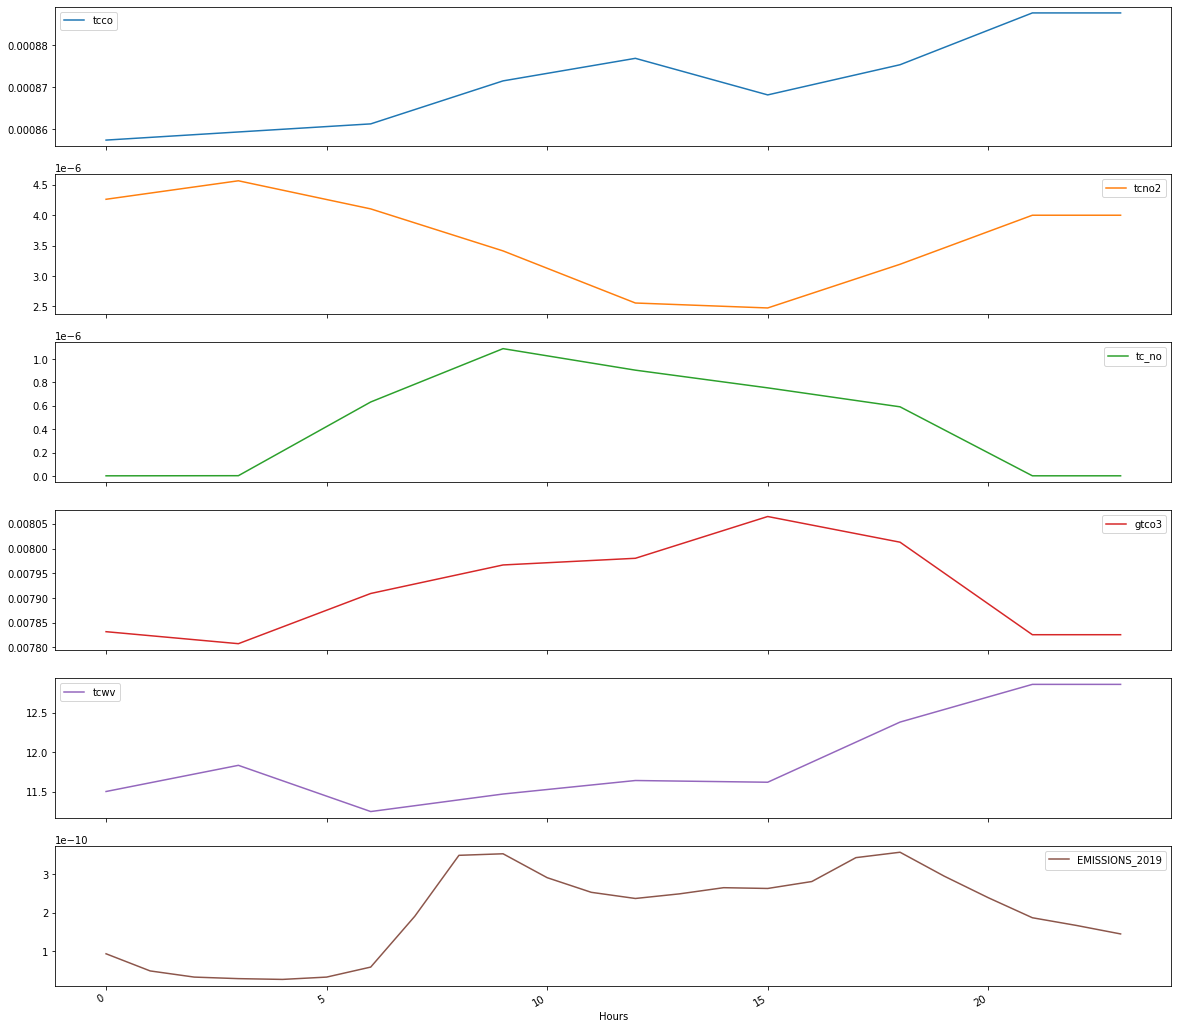

In [ ]:
d4.plot(subplots=True, figsize=(20,20))

In [ ]:
import pandas as pd
from sklearn import preprocessing
import seaborn as sns

x = pure_dataset.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
pure_dataset = pd.DataFrame(x_scaled, columns=pure_dataset.columns, index=pure_dataset.index)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f37719f6b50>,
      dtype=object)

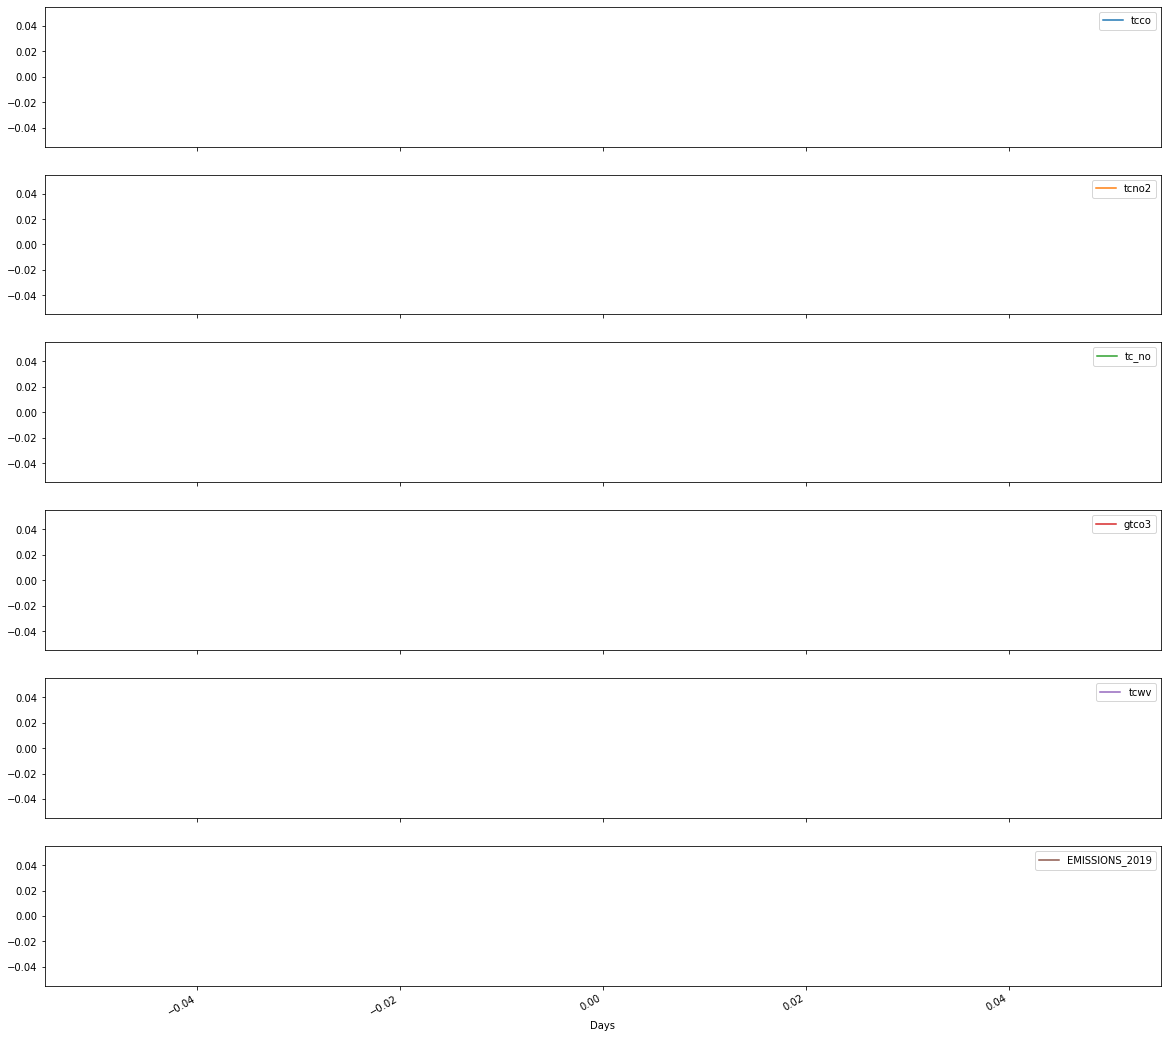

In [ ]:
d1 = pure_dataset[pure_dataset.index.get_level_values("lat") == 44.5]
d2 = d1[d1.index.get_level_values('long') == 7.00]
d2.groupby('Days').mean().plot(subplots=True, figsize=(20,20))

In [ ]:
#pure_dataset.plot()

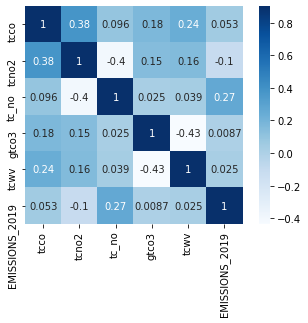

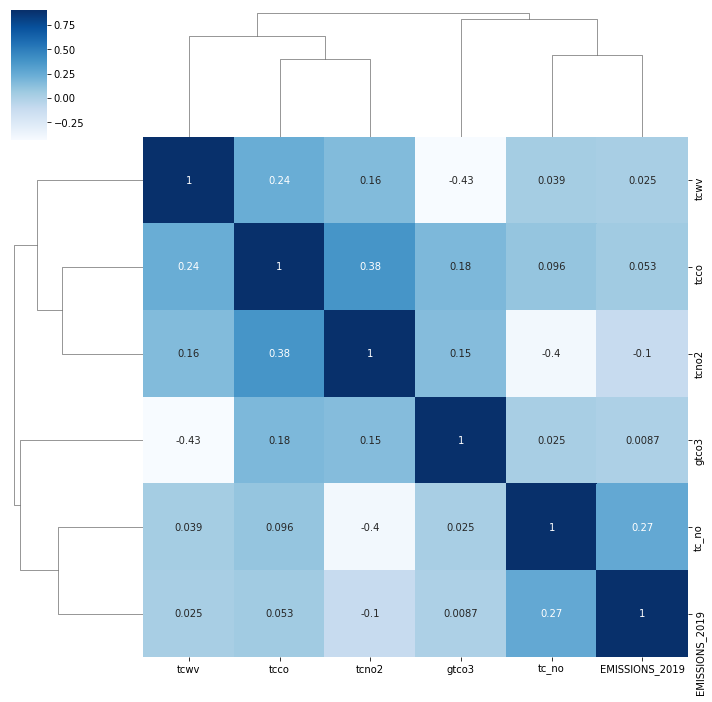

In [ ]:
corrmat = pure_dataset.corr()
#plt.figure(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True,cmap="Blues",annot=True);
#plt.figure(figsize=(20,10))
sns.clustermap(corrmat, vmax=0.9, cmap="Blues",annot=True);

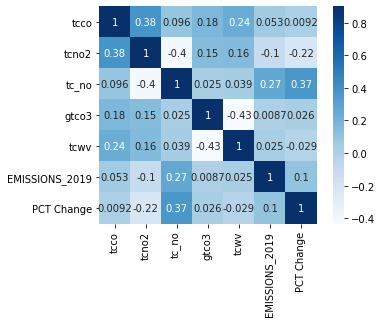

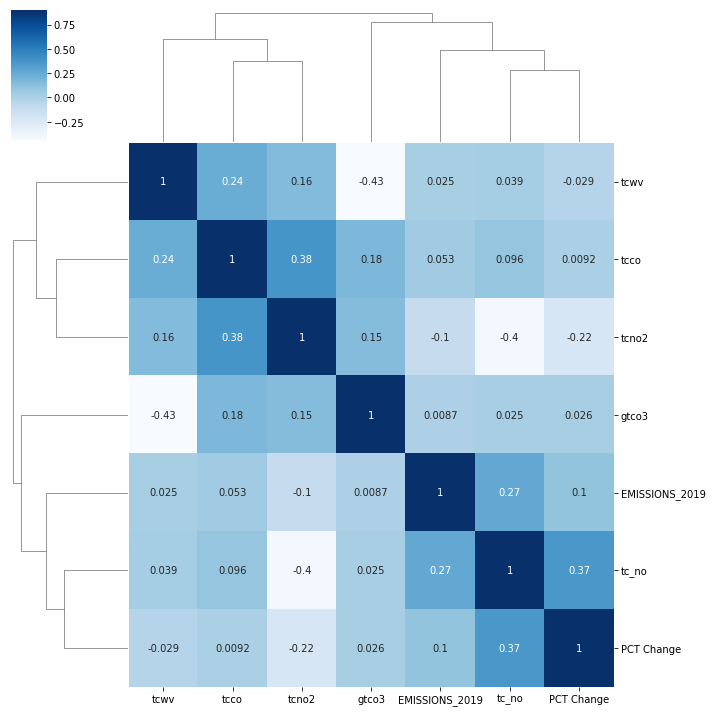

In [ ]:
pure_dataset['PCT Change']=pure_dataset['EMISSIONS_2019'].pct_change()
corrmat = pure_dataset.corr()
#plt.figure(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True,cmap="Blues",annot=True);
#plt.figure(figsize=(20,10))
sns.clustermap(corrmat, vmax=0.9, cmap="Blues",annot=True);

Shifting

In [ ]:
import pandas as pd
import xarray as xr
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

from sklearn.feature_selection import VarianceThreshold


#normalize dataset
df_noindex = pure_dataset.reset_index()
df_noindex = df_noindex.sort_values(['lat','long','Days', 'Hours'])  
df = df_noindex.dropna()
df

,lat,long,Days,Hours,tcco,tcno2,tc_no,gtco3,tcwv,EMISSIONS_2019,PCT Change
1,43.25,4.5,1,6,0.867552,0.187133,0.257981,0.290894,0.309431,0.061657,1.000298
2,43.25,4.5,1,9,0.899266,0.139382,0.368112,0.254841,0.303893,0.363823,4.900731
3,43.25,4.5,1,12,0.911022,0.180385,0.356401,0.203569,0.313410,0.244601,-0.327692
4,43.25,4.5,1,15,0.908882,0.174670,0.308991,0.180494,0.314281,0.271323,0.109248
5,43.25,4.5,1,18,0.910305,0.224777,0.182774,0.173341,0.318171,0.367934,0.356073
...,...,...,...,...,...,...,...,...,...,...,...
53995,50.25,11.5,30,12,0.407913,0.079953,0.204553,0.220977,0.278247,0.028345,-0.143876
53996,50.25,11.5,30,15,0.360811,0.114472,0.218280,0.182783,0.418462,0.031974,0.128041
53997,50.25,11.5,30,18,0.324059,0.188120,0.150076,0.174843,0.533556,0.033562,0.049660
53998,50.25,11.5,30,21,0.355968,0.278093,0.000473,0.147297,0.602365,0.019045,-0.432551


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


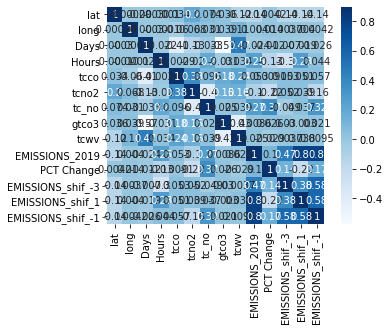

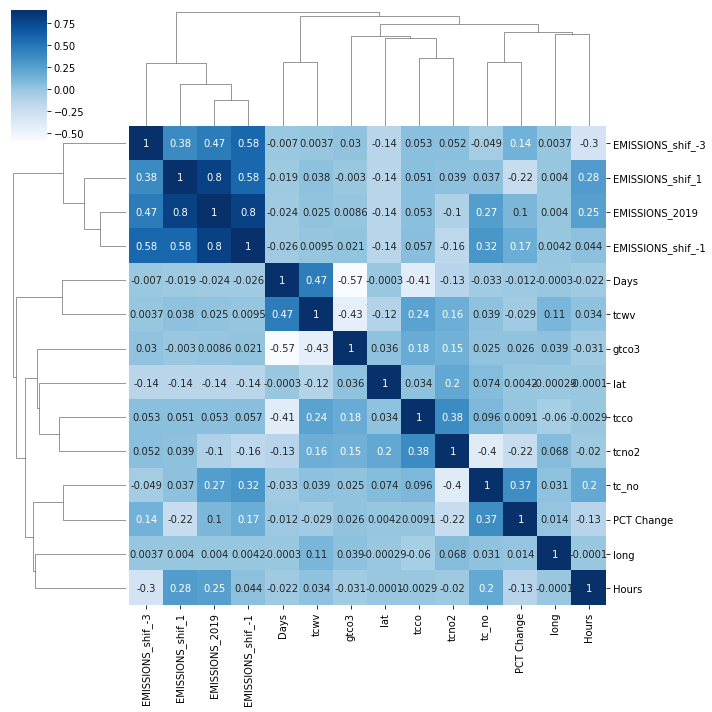

In [ ]:
df_norm = df
y_3_name = 'EMISSIONS_shif_-3'
df_norm[y_3_name]=df_norm.EMISSIONS_2019.shift(periods=-3)
df_norm=df_norm.dropna(subset = [y_3_name])
df_norm.head()

y_1_name = 'EMISSIONS_shif_1'
df_norm[y_1_name]=df_norm.EMISSIONS_2019.shift(periods=1)
df_norm=df_norm.dropna(subset = [y_1_name])
df_norm.head()

y_m1_name = 'EMISSIONS_shif_-1'
df_norm[y_m1_name]=df_norm.EMISSIONS_2019.shift(periods=-1)
df_norm=df_norm.dropna(subset = [y_m1_name])
df_norm.head()

corrmat = df_norm.corr()
#plt.figure(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True,cmap="Blues",annot=True);
#plt.figure(figsize=(20,10))
sns.clustermap(corrmat, vmax=0.9, cmap="Blues",annot=True);

In [ ]:
import pandas as pd

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [ ]:
scaler = MinMaxScaler()
df_cleaned = clean_dataset(df)
df_norm =  pd.DataFrame(scaler.fit_transform(df_cleaned), columns=df.columns)
df_norm

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,lat,long,Days,Hours,tcco,tcno2,tc_no,gtco3,tcwv,EMISSIONS_2019,PCT Change,EMISSIONS_shif_-3
0,0.0,0.0,0.000000,0.285714,0.867552,0.187133,0.257981,0.290894,0.309431,0.061657,0.036238,0.271323
1,0.0,0.0,0.000000,0.428571,0.899266,0.139382,0.368112,0.254841,0.303893,0.363823,0.106900,0.367934
2,0.0,0.0,0.000000,0.571429,0.911022,0.180385,0.356401,0.203569,0.313410,0.244601,0.012180,0.193212
3,0.0,0.0,0.000000,0.714286,0.908882,0.174670,0.308991,0.180494,0.314281,0.271323,0.020096,0.088379
4,0.0,0.0,0.000000,0.857143,0.910305,0.224777,0.182774,0.173341,0.318171,0.367934,0.024567,0.036044
...,...,...,...,...,...,...,...,...,...,...,...,...
53990,1.0,1.0,0.966667,0.142857,0.457442,0.195035,0.012064,0.291028,0.177671,0.003166,0.012067,0.028345
53991,1.0,1.0,0.966667,0.285714,0.470528,0.126074,0.186429,0.280360,0.175453,0.021767,0.124535,0.031974
53992,1.0,1.0,0.966667,0.428571,0.464079,0.086107,0.202332,0.261000,0.205507,0.033108,0.027556,0.033562
53993,1.0,1.0,0.966667,0.571429,0.407913,0.079953,0.204553,0.220977,0.278247,0.028345,0.015510,0.019045


In [ ]:
y_3_name = 'EMISSIONS_shif_-3'
df_norm[y_3_name]=df_norm.EMISSIONS_2019.shift(periods=-3)
df_norm=df_norm.dropna(subset = [y_3_name])
df_norm.head()

y_1_name = 'EMISSIONS_shif_1'
df_norm[y_1_name]=df_norm.EMISSIONS_2019.shift(periods=1)
df_norm=df_norm.dropna(subset = [y_1_name])
df_norm.head()

y_m1_name = 'EMISSIONS_shif_-1'
df_norm[y_m1_name]=df_norm.EMISSIONS_2019.shift(periods=-1)
df_norm=df_norm.dropna(subset = [y_m1_name])
df_norm.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,lat,long,Days,Hours,tcco,tcno2,tc_no,gtco3,tcwv,EMISSIONS_2019,PCT Change,EMISSIONS_shif_-3,EMISSIONS_shif_1,EMISSIONS_shif_-1
1,0.0,0.0,0.0,0.428571,0.899266,0.139382,0.368112,0.254841,0.303893,0.363823,0.106900,0.367934,0.061657,0.244601
2,0.0,0.0,0.0,0.571429,0.911022,0.180385,0.356401,0.203569,0.313410,0.244601,0.012180,0.193212,0.363823,0.271323
3,0.0,0.0,0.0,0.714286,0.908882,0.174670,0.308991,0.180494,0.314281,0.271323,0.020096,0.088379,0.244601,0.367934
4,0.0,0.0,0.0,0.857143,0.910305,0.224777,0.182774,0.173341,0.318171,0.367934,0.024567,0.036044,0.271323,0.193212
5,0.0,0.0,0.0,1.000000,0.910357,0.276605,0.008272,0.177801,0.342746,0.193212,0.009513,0.072097,0.367934,0.088379


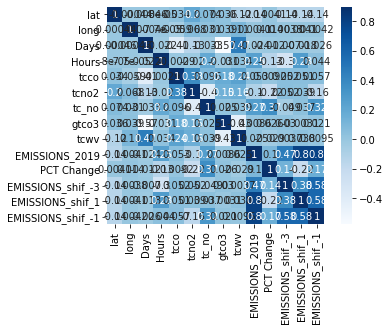

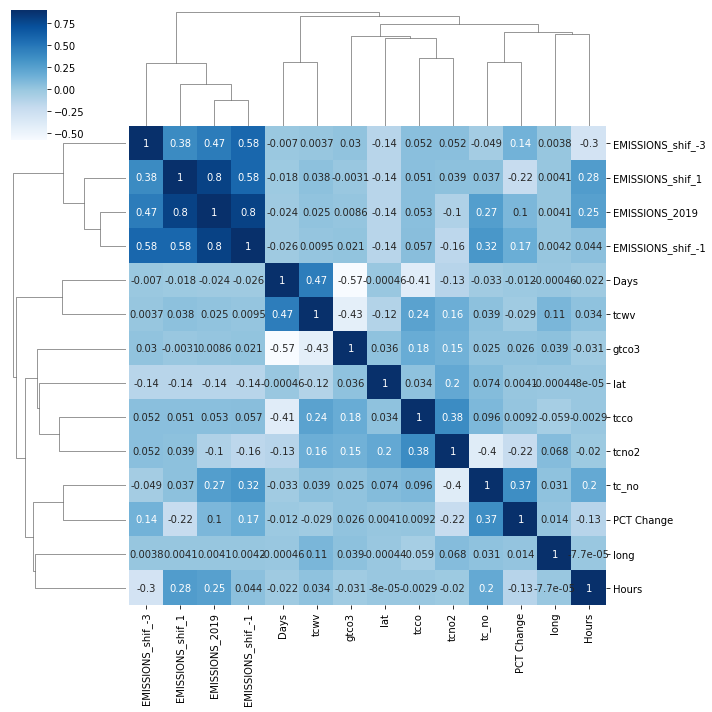

In [ ]:
corrmat = df_norm.corr()
#plt.figure(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True,cmap="Blues",annot=True);
#plt.figure(figsize=(20,10))
sns.clustermap(corrmat, vmax=0.9, cmap="Blues",annot=True);

### Feature importance with random forest¶


In [ ]:
x_name = [x for x in df_norm.columns if x not in ['EMISSIONS_2019', 'EMISSIONS_shif_-1','EMISSIONS_shif_1','EMISSIONS_shif_-3']]
y_name = ['EMISSIONS_2019', 'EMISSIONS_shif_-1','EMISSIONS_shif_1','EMISSIONS_shif_-3']

In [ ]:
forest = ExtraTreesRegressor(n_estimators=100, random_state=0) #Random_state=0 is error because now everytime we run the script we get a different result
forest.fit(df_norm[x_name], df_norm[y_name])

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=0, verbose=0, warm_start=False)

Feature ranking:
 1. feature  9 PCT Change (0.477)
 2. feature  0     lat (0.199)
 3. feature  1    long (0.151)
 4. feature  3   Hours (0.128)
 5. feature  4    tcco (0.011)
 6. feature  6   tc_no (0.011)
 7. feature  8    tcwv (0.007)
 8. feature  5   tcno2 (0.006)
 9. feature  7   gtco3 (0.005)
10. feature  2    Days (0.004)


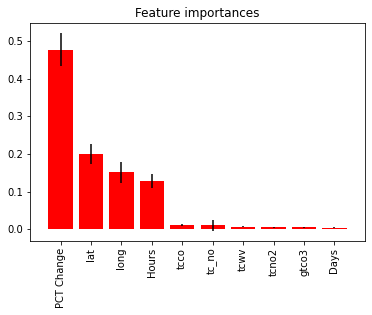

In [ ]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(df_norm[x_name].shape[1]):
    print("%2d. feature %2d %7s (%.3f)" % (f + 1, indices[f], df_norm[x_name].columns[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(df_norm[x_name].shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(df_norm[x_name].shape[1]), df_norm[x_name].columns[indices],rotation=90)
plt.xlim([-1, df_norm[x_name].shape[1]])
plt.show()

## Integrate economic index_ milan stock market 

In [ ]:
mib = pd.read_csv('Data/FTSEMIBMI.csv')
mib

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-03-21,22838.0,22858.0,22674.0,22820.0,22820.0,352950500
1,2018-03-22,22694.0,22830.0,22208.0,22398.0,22398.0,474962400
2,2018-03-23,22127.0,22367.0,21965.0,22289.0,22289.0,469142100
3,2018-03-26,22354.0,22354.0,21921.0,22012.0,22012.0,362325200
4,2018-03-27,22337.0,22394.0,22171.0,22210.0,22210.0,336429900
...,...,...,...,...,...,...,...
295,2019-05-24,20261.0,20464.0,20245.0,20376.0,20376.0,425582400
296,2019-05-27,20417.0,20683.0,20299.0,20363.0,20363.0,308042900
297,2019-05-28,20349.0,20359.0,20093.0,20261.0,20261.0,708887600
298,2019-05-29,20087.0,20104.0,19928.0,20000.0,20000.0,388969800


In [ ]:
mib.Date = pd.to_datetime(mib.Date)
mib['Days'] = [d.day for d in mib.Date]
mib['Year'] = [d.year for d in mib.Date]
mib['Month'] = [d.month for d in mib.Date]

mib= mib[mib['Year']== 2019]
mib= mib[mib['Month']== 5]
mib = mib[['Days', 'Open', 'High', 'Low', 'Adj Close', 'Volume']]
mib

,Days,Open,High,Low,Adj Close,Volume
279,2,21834.0,21915.0,21677.0,21710.0,359603300
280,3,21713.0,21812.0,21665.0,21763.0,308603200
281,6,21317.0,21469.0,21246.0,21409.0,356675600
282,7,21444.0,21555.0,21173.0,21219.0,509334800
283,8,21207.0,21257.0,21031.0,21204.0,468009600
284,9,21102.0,21104.0,20789.0,20817.0,501271000
285,10,21006.0,21051.0,20837.0,20875.0,372063000
286,13,20909.0,20911.0,20586.0,20594.0,446913000
287,14,20700.0,20893.0,20650.0,20893.0,456220900
288,15,20898.0,20905.0,20556.0,20863.0,586426500


In [ ]:
mib.set_index('Days', append=True, inplace=True)
mib.reset_index(level = [0], drop=True, inplace=True)

In [ ]:
mib

,Open,High,Low,Adj Close,Volume
Days,,,,,
2,21834.0,21915.0,21677.0,21710.0,359603300
3,21713.0,21812.0,21665.0,21763.0,308603200
6,21317.0,21469.0,21246.0,21409.0,356675600
7,21444.0,21555.0,21173.0,21219.0,509334800
8,21207.0,21257.0,21031.0,21204.0,468009600
9,21102.0,21104.0,20789.0,20817.0,501271000
10,21006.0,21051.0,20837.0,20875.0,372063000
13,20909.0,20911.0,20586.0,20594.0,446913000
14,20700.0,20893.0,20650.0,20893.0,456220900


In [ ]:
#economic = pd.concat([complete_dataset, mib], axis=1)
economic =complete_dataset.join(mib)

In [ ]:
economic

co_conc  no2_conc   no_conc  ...  Low  Adj Close  Volume
lat   long Days Hours                                  ...                        
44.55 8.6  1    0      161.228439  6.017477  0.002970  ...  NaN        NaN     NaN
                1      155.539841  5.553236  0.002181  ...  NaN        NaN     NaN
                2      152.060532  4.738773  0.002103  ...  NaN        NaN     NaN
                3      150.001541  4.275709  0.002771  ...  NaN        NaN     NaN
                4      149.475342  4.398557  0.004945  ...  NaN        NaN     NaN
...                           ...       ...       ...  ...  ...        ...     ...
45.95 10.0 31   19     155.681015  1.715020  0.031832  ...  NaN        NaN     NaN
                20     158.502625  1.780002  0.025466  ...  NaN        NaN     NaN
                21     156.757797  2.247255  0.007383  ...  NaN        NaN     NaN
                22     152.725143  2.632547  0.003439  ...  NaN        NaN     NaN
                23     148.520950  2.887191  0.002252  ...  NaN        NaN     NaN

[167400 rows x 12 columns]

In [ ]:
economic.head(50)

co_conc  no2_conc  ...  Adj Close       Volume
lat   long Days Hours                        ...                        
44.55 8.6  1    0      161.228439  6.017477  ...        NaN          NaN
                1      155.539841  5.553236  ...        NaN          NaN
                2      152.060532  4.738773  ...        NaN          NaN
                3      150.001541  4.275709  ...        NaN          NaN
                4      149.475342  4.398557  ...        NaN          NaN
                5      151.212234  4.551239  ...        NaN          NaN
                6      163.598785  4.741344  ...        NaN          NaN
                7      170.199295  5.615679  ...        NaN          NaN
                8      169.923233  5.187692  ...        NaN          NaN
                9      169.156494  4.056328  ...        NaN          NaN
                10     157.179916  3.114639  ...        NaN          NaN
                11     157.269592  2.886696  ...        NaN          NaN
                12     157.527176  2.210758  ...        NaN          NaN
                13     156.012222  1.631228  ...        NaN          NaN
                14     155.006546  1.703851  ...        NaN          NaN
                15     155.929977  1.956379  ...        NaN          NaN
                16     163.046066  2.390656  ...        NaN          NaN
                17     164.722809  2.748383  ...        NaN          NaN
                18     165.320969  3.416549  ...        NaN          NaN
                19     161.882202  4.646204  ...        NaN          NaN
                20     158.223206  5.918466  ...        NaN          NaN
                21     159.500519  5.663252  ...        NaN          NaN
                22     157.655167  4.918075  ...        NaN          NaN
                23     153.915527  4.540226  ...        NaN          NaN
           2    0      149.586334  3.230291  ...    21710.0  359603300.0
                1      155.496185  3.223697  ...    21710.0  359603300.0
                2      148.037735  2.963519  ...    21710.0  359603300.0
                3      148.697998  2.616012  ...    21710.0  359603300.0
                4      154.650375  2.880576  ...    21710.0  359603300.0
                5      151.145065  4.483254  ...    21710.0  359603300.0
                6      153.405807  7.814384  ...    21710.0  359603300.0
                7      164.085144  9.283751  ...    21710.0  359603300.0
                8      168.171738  7.711066  ...    21710.0  359603300.0
                9      173.947372  5.451219  ...    21710.0  359603300.0
                10     180.655746  3.875847  ...    21710.0  359603300.0
                11     176.150940  2.988377  ...    21710.0  359603300.0
                12     171.160217  2.661486  ...    21710.0  359603300.0
                13     159.651184  2.723930  ...    21710.0  359603300.0
                14     146.475723  2.280032  ...    21710.0  359603300.0
                15     139.755356  2.664777  ...    21710.0  359603300.0
                16     138.472565  3.902038  ...    21710.0  359603300.0
                17     140.736267  4.401599  ...    21710.0  359603300.0
                18     143.898880  4.754796  ...    21710.0  359603300.0
                19     147.407654  4.172222  ...    21710.0  359603300.0
                20     152.187607  3.792827  ...    21710.0  359603300.0
                21     163.415344  3.897284  ...    21710.0  359603300.0
                22     185.917419  3.566498  ...    21710.0  359603300.0
                23     197.669388  3.571856  ...    21710.0  359603300.0
           3    0      197.254166  3.361286  ...    21763.0  308603200.0
                1      186.294266  3.242185  ...    21763.0  308603200.0

[50 rows x 12 columns]

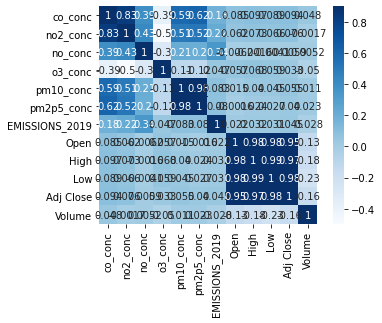

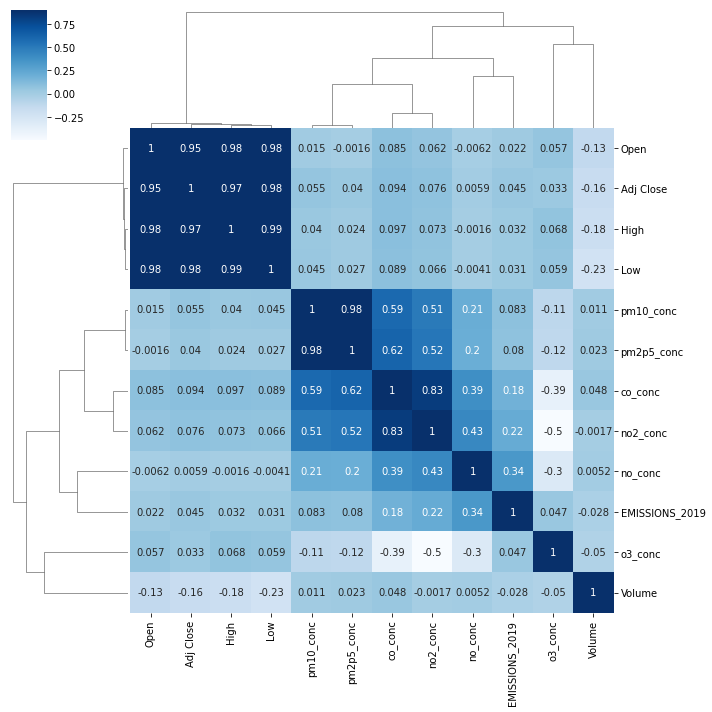

In [ ]:
corrmat = economic.corr()
#plt.figure(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True,cmap="Blues",annot=True);
#plt.figure(figsize=(20,10))
sns.clustermap(corrmat, vmax=0.9, cmap="Blues",annot=True);